In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first 5 rows to understand the data
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
# Check the columns in your dataframe to select the features
print(df.columns)

# For Simple Linear Regression: Choose one feature and the target variable
# Let's use 'area' to predict 'price' (assuming these columns exist in your Housing.csv)
# If your columns have different names, replace them here.
X_simple = df[['area']] # Feature must be a 2D array/DataFrame
y_simple = df['price'] # Target variable

# Split the data for Simple Linear Regression
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.3, random_state=42)

# For Multiple Linear Regression: Choose multiple features
# Let's use 'area', 'bedrooms', and 'bathrooms' (again, adjust if needed)
X_multiple = df[['area', 'bedrooms', 'bathrooms']]
y_multiple = df['price']

# Split the data for Multiple Linear Regression
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.3, random_state=42)

print(f"Shape of X_train_simple: {X_train_simple.shape}")
print(f"Shape of y_train_simple: {y_train_simple.shape}")

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Shape of X_train_simple: (381, 1)
Shape of y_train_simple: (381,)


In [3]:
# Create a Linear Regression model instance
simple_model = LinearRegression()
multiple_model = LinearRegression()

# Train the Simple Linear Regression model
simple_model.fit(X_train_simple, y_train_simple)

# Train the Multiple Linear Regression model
multiple_model.fit(X_train_multiple, y_train_multiple)

# Make predictions on the test data
y_pred_simple = simple_model.predict(X_test_simple)
y_pred_multiple = multiple_model.predict(X_test_multiple)

print("Simple model coefficients:", simple_model.coef_)
print("Simple model intercept:", simple_model.intercept_)

print("Multiple model coefficients:", multiple_model.coef_)
print("Multiple model intercept:", multiple_model.intercept_)

Simple model coefficients: [449.44700819]
Simple model intercept: 2457461.528387109
Multiple model coefficients: [3.71450579e+02 3.74297346e+05 1.40247297e+06]
Multiple model intercept: -20291.08854601346


In [4]:
# Evaluate the Simple Linear Regression model
print("Simple Linear Regression Model Evaluation:")
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")

print("\n" + "="*50 + "\n")

# Evaluate the Multiple Linear Regression model
print("Multiple Linear Regression Model Evaluation:")
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)
print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"R-squared: {r2_multiple:.2f}")

Simple Linear Regression Model Evaluation:
MAE: 1387227.90
MSE: 3193989923757.62
R-squared: 0.26


Multiple Linear Regression Model Evaluation:
MAE: 1184955.93
MSE: 2379848918341.32
R-squared: 0.45


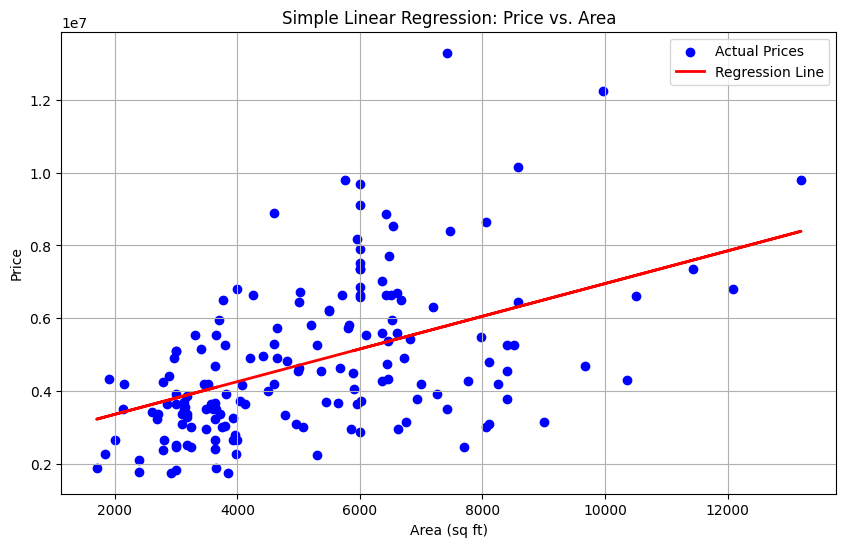

In [5]:
# Plotting the Simple Linear Regression results
plt.figure(figsize=(10, 6))

# Plot the actual data points from the test set
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Prices')

# Plot the regression line
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.title('Simple Linear Regression: Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()